In [19]:
%matplotlib inline
from wpimath.trajectory import TrajectoryConfig, TrajectoryGenerator
from wpimath.trajectory.constraint import CentripetalAccelerationConstraint
from wpimath.geometry import Pose2d, Rotation2d, Translation2d
import matplotlib.pyplot as plt

In [2]:
config = TrajectoryConfig(maxVelocity=1, maxAcceleration=2)

initial_pose = Pose2d(x=0, y=0, rotation=Rotation2d(0))
waypoints = [Translation2d(x=1, y=1), Translation2d(x=2, y=-1)]
final_pose = Pose2d(x=3, y=0, rotation=Rotation2d(0))

In [3]:
centripetal_constraint = CentripetalAccelerationConstraint(maxCentripetalAcceleration=2)
config.addConstraint(centripetal_constraint)

trajectory = TrajectoryGenerator.generateTrajectory(
    start=initial_pose,
    interiorWaypoints=waypoints,
    end=final_pose,
    config=config
    )

sampled_states = []
states = trajectory.states()
for i in range(0, len(states), 8):
    sampled_states.append(states[i])


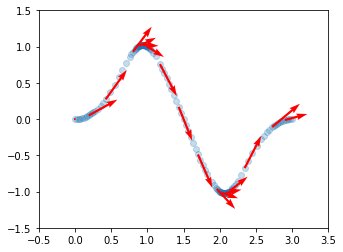

In [21]:
fig, ax = plt.subplots()
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 1.5)
ax.scatter(
    [s.pose.X() for s in trajectory.states()],
    [s.pose.Y() for s in trajectory.states()],
    alpha=0.25,
)

ax.quiver(
        [s.pose.X() for s in sampled_states],
        [s.pose.Y() for s in sampled_states],
        [s.velocity * s.pose.rotation().cos() for s in sampled_states],
        [s.velocity * s.pose.rotation().sin() for s in sampled_states],
        angles="xy",
        scale_units="xy",
        scale=2,
        color='r'
        # width=0.0125,
    )
ax.set_aspect("equal", "box")
plt.savefig("trajectory.svg")
plt.show()

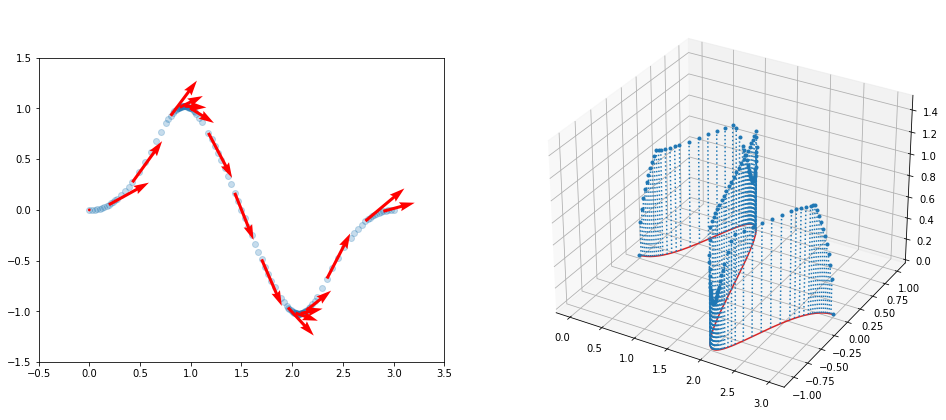

In [26]:
x = [state.pose.translation().x for state in trajectory.states()]
y = [state.pose.translation().y for state in trajectory.states()]
velocity = [state.velocity for state in trajectory.states()]


fig = plt.figure(figsize=(16, 9))

ax1= fig.add_subplot(1, 2, 1)
ax1.scatter(
    [s.pose.X() for s in trajectory.states()],
    [s.pose.Y() for s in trajectory.states()],
    alpha=0.25,
)
ax1.set_aspect("equal", "box")

ax1.quiver(
        [s.pose.X() for s in sampled_states],
        [s.pose.Y() for s in sampled_states],
        [s.velocity * s.pose.rotation().cos() for s in sampled_states],
        [s.velocity * s.pose.rotation().sin() for s in sampled_states],
        angles="xy",
        scale_units="xy",
        scale=2,
        color='r'
        # width=0.0125,
    )
ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-1.5, 1.5)

ax2= fig.add_subplot(1, 2, 2, projection= '3d')
ax2.set_zlim([0, 1.5])
ax2.stem(x, y, velocity, linefmt=':', markerfmt='.')
plt.savefig("trajectory_3.svg")
